In [1]:
pip install statsmodels matplotlib scikit-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/gold.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())
print(data.info())


         Date  USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
0  2001-01-02    272.80    271.10   183.026   181.617    288.677    287.334
1  2001-01-03    269.00    267.15   178.916   177.390    281.823    281.655
2  2001-01-04    268.75    267.10   178.869   178.352    282.538    282.049
3  2001-01-05    268.00    267.40   178.488   178.148    280.775    280.882
4  2001-01-08    268.60    268.30   178.769   178.664    282.410    282.481
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4718 non-null   object 
 1   USD (AM)   4718 non-null   float64
 2   USD (PM)   4682 non-null   float64
 3   GBP (AM)   4718 non-null   float64
 4   GBP (PM)   4682 non-null   float64
 5   EURO (AM)  4718 non-null   float64
 6   EURO (PM)  4682 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.1+ KB
None


<ipython-input-3-633e039b7532>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series = data['USD (AM)'].fillna(method='ffill')


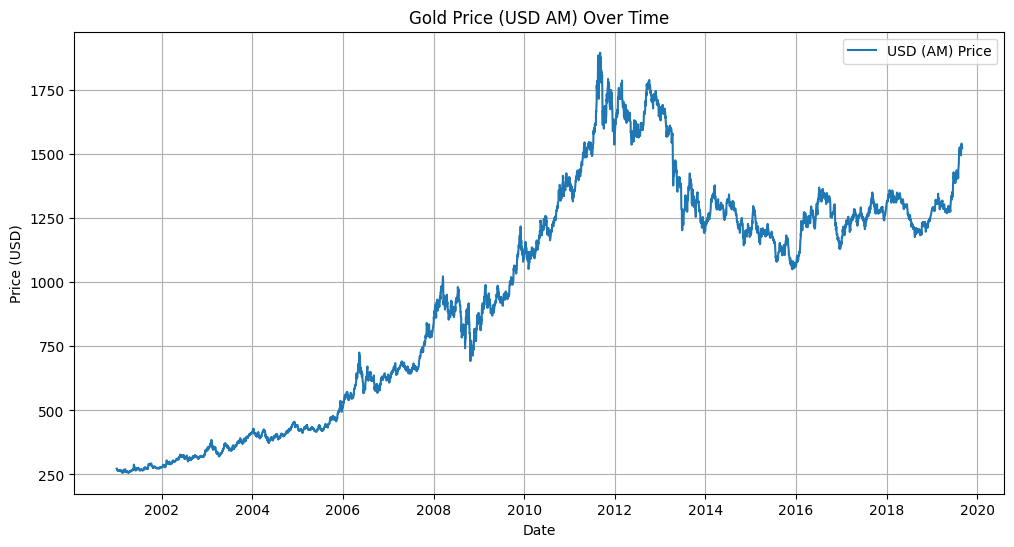

In [3]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as the index
data.set_index('Date', inplace=True)

# Fill missing values in USD (AM) using forward fill
time_series = data['USD (AM)'].fillna(method='ffill')

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='USD (AM) Price')
plt.title('Gold Price (USD AM) Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [4]:
# 80% training, 20% testing
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]


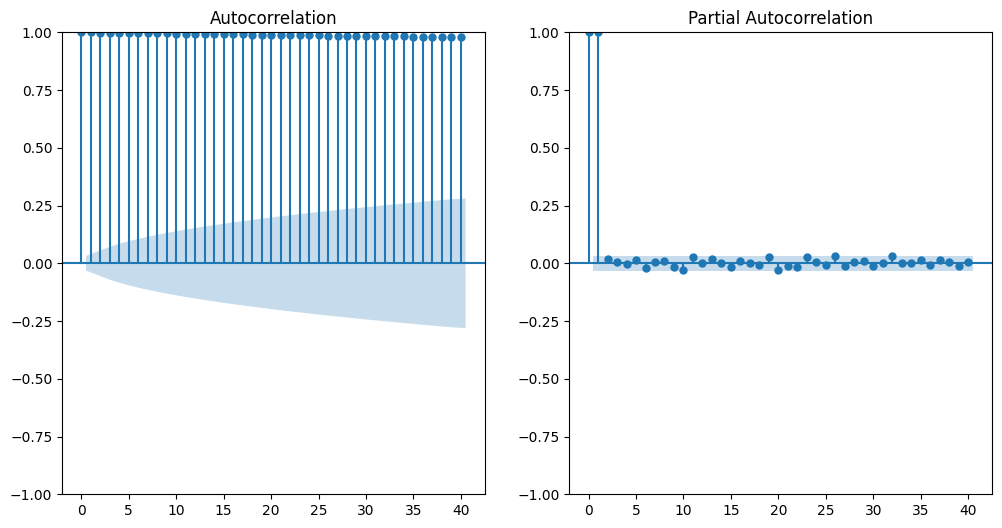

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(train, lags=40, ax=plt.subplot(121))
plot_pacf(train, lags=40, ax=plt.subplot(122))
plt.show()


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Replace (5, 1, 0) with optimal (p, d, q)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               USD (AM)   No. Observations:                 3774
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14745.482
Date:                Thu, 17 Apr 2025   AIC                          29502.964
Time:                        08:35:28   BIC                          29540.378
Sample:                             0   HQIC                         29516.266
                               - 3774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0318      0.008     -3.769      0.000      -0.048      -0.015
ar.L2         -0.0166      0.010     -1.584      0.113      -0.037       0.004
ar.L3          0.0026      0.010      0.262      0.7

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error (MSE): 49014.71921410331


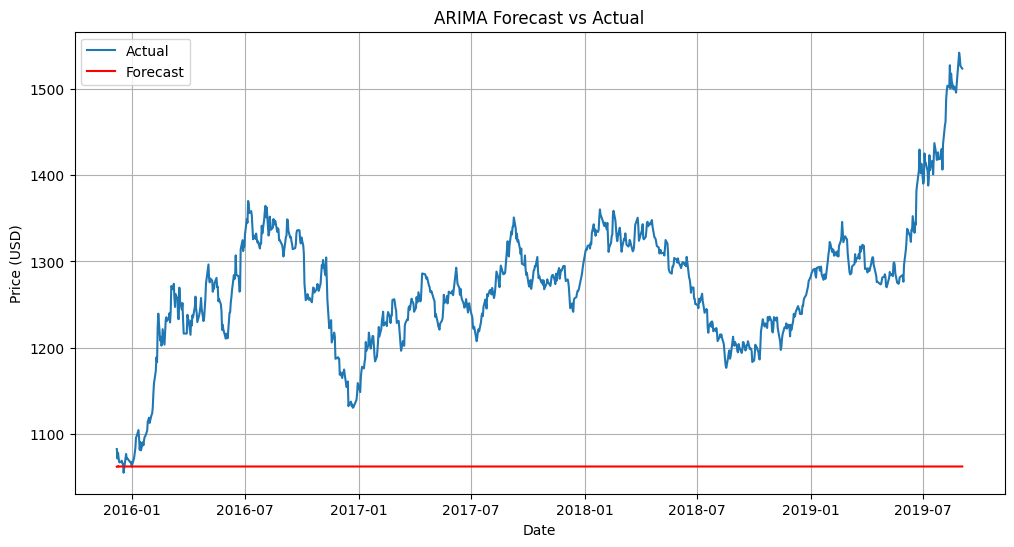

In [7]:
from sklearn.metrics import mean_squared_error

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate MSE
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error (MSE): {mse}")

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing is needed.")


ADF Statistic: -1.2651773852671582
p-value: 0.6449493742502508
The series is not stationary. Differencing is needed.


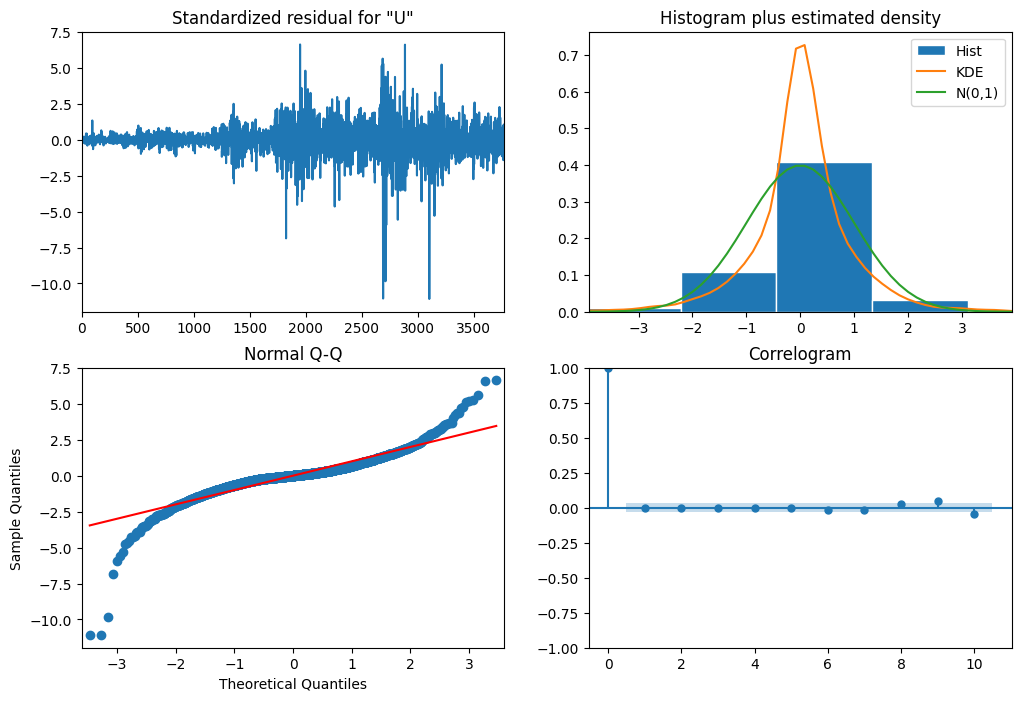

In [9]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()
